1. **Credit Card Fraud Detection Dataset (Imbalanced Classes and Large Dataset)**: This dataset is widely used for studying imbalanced classes in the context of fraud detection. It typically includes a large number of legitimate transactions and a relatively small number of fraudulent transactions, making it imbalanced. Additionally, its size is usually considerable, making it a good choice for testing the performance of algorithms on larger datasets.

    - **Where to Find**: The Credit Card Fraud Detection dataset is often available on Kaggle. You can [find it here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

2. **UCI ML Repository's Spambase Dataset (Noisy Data/Features)**: The Spambase dataset from the UCI Machine Learning Repository consists of spam and non-spam emails. It's a good example of a dataset with noisy features, as email data often contains various irrelevant or misleading features that the models need to navigate.

    - **Where to Find**: The Spambase dataset is available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/spambase).

3. **Gene Expression Cancer RNA-Seq Dataset (Varying Degrees of Dimensionality)**: This dataset is suitable for exploring high-dimensional data challenges. It contains gene expression profiles, which typically involve thousands of features (gene expression levels), providing a scenario with very high dimensionality.

    - **Where to Find**: The Gene Expression Cancer RNA-Seq dataset can be found on platforms like Kaggle. [Here is a link to one such dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

Each of these datasets will allow you to explore a different aspect of machine learning model performance and suitability, with the Credit Card Fraud Detection dataset covering both large size and imbalanced classes, the Spambase dataset providing a scenario with noisy data and features, and the Gene Expression dataset offering a high-dimensional data challenge.

# 1. Loading Dataset, vesualize it and preproccessing it

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Data splitting
from sklearn.model_selection import train_test_split

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Model training and evaluation
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Resampling
from imblearn.over_sampling import SMOTE

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data = pd.read_csv('creditcard.csv')  

# Explore the first few rows
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:

# Descriptive statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Check for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# 2. Model training

In [6]:

# Drop unnecessary columns if any (like 'Time' or any non-analytical columns)
data.drop(['Time'], axis=1, inplace=True)  # If 'Time' is irrelevant

# Normalize the 'Amount' column since it's on a different scale
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Split data into features and target
X = data.drop('Class', axis=1)
y = data['Class']
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# Apply SMOTE to generate synthetic samples for minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(np.bincount(y_train_smote))


[227451 227451]


# 3. Model Evaluation:

### For Random Forest:

In [8]:
# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)

# Predictions
rf_predictions = rf_clf.predict(X_test)

# Evaluation
print("Random Forest Classifier Evaluation:")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### For XGBoost:

In [9]:
# Initialize the XGBoost Classifier with GPU support
xgb_clf = XGBClassifier(
    tree_method='hist',  # Use histogram-based method
    device='cuda',       # Enable GPU support
    random_state=42
)


xgb_clf.fit(X_train_smote, y_train_smote)

# Predictions
xgb_predictions = xgb_clf.predict(X_test)

# Evaluation
print("XGBoost Classifier Evaluation:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classifier Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.86      0.76        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962



c:\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:06:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


## 4. Model Interpretation:

### Confusion Matrix Visualization & ROC Curve Visualization:

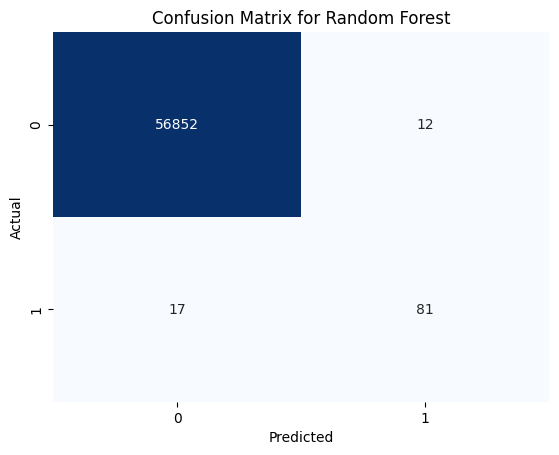

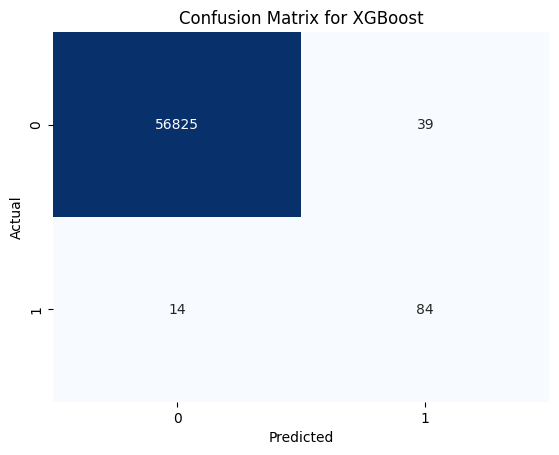

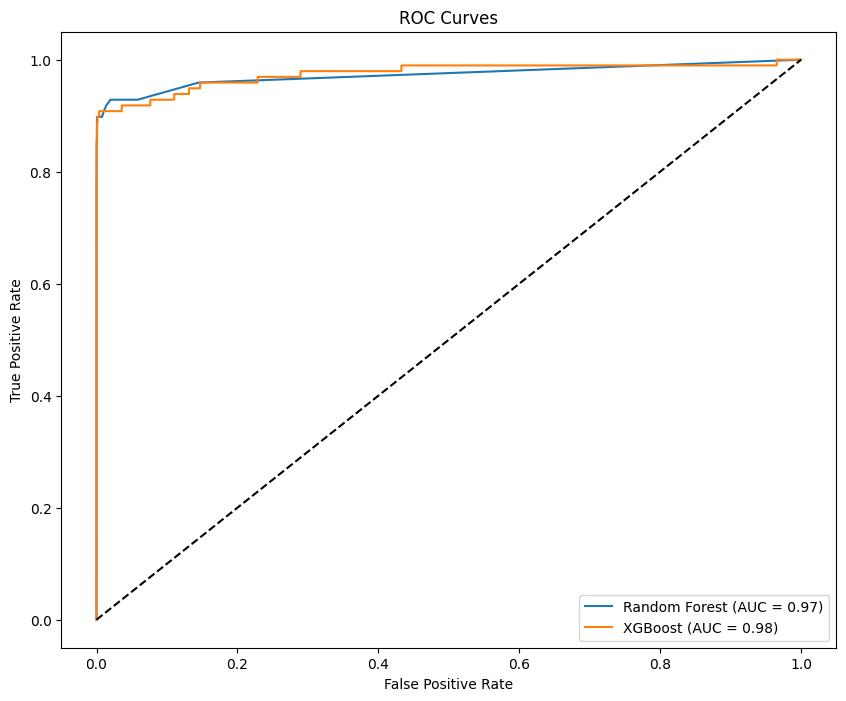

In [10]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot Confusion Matrix and ROC Curves
rf_cm = confusion_matrix(y_test, rf_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)

plot_confusion_matrix(rf_cm, 'Random Forest')
plot_confusion_matrix(xgb_cm, 'XGBoost')

plt.figure(figsize=(10, 8))
plot_roc_curve(rf_clf, X_test, y_test, 'Random Forest')
plot_roc_curve(xgb_clf, X_test, y_test, 'XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


# 5. Model Improvement (Hyperparameter Tuning):

#### For Random Forest:

In [11]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with higher verbosity
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,  # Use all available cores
    verbose=3  # Higher verbosity for more detailed progress output
)

# Perform the grid search
grid_search_rf.fit(X_train_smote, y_train_smote)

# Output the best parameters and best score
print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best AUC score found for Random Forest: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found for Random Forest:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best AUC score found for Random Forest:  0.9999962920099362


#### For XGBoost:

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with updated GPU settings
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'tree_method': ['hist'],  # Use histogram-based method
    'device': ['cuda']        # Enable GPU support
}

# Initialize the XGBClassifier and GridSearchCV
xgb_clf = XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Perform the grid search
grid_search_xgb.fit(X_train_smote, y_train_smote)

# Output the best parameters and best score
print("Best parameters found for XGBoost: ", grid_search_xgb.best_params_)
print("Best AUC score found for XGBoost: ", grid_search_xgb.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found for XGBoost:  {'colsample_bytree': 0.6, 'device': 'cuda', 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8, 'tree_method': 'hist'}
Best AUC score found for XGBoost:  0.9999936221097983


# 6. Validation and Robustness Check (Cross-Validation):

### For Random Forest:

In [28]:
from sklearn.model_selection import cross_val_score

# Use the best estimator from the grid search for Random Forest
best_rf_clf = grid_search_rf.best_estimator_

# Perform cross-validation for Random Forest
cv_scores_rf = cross_val_score(
    best_rf_clf,
    X_scaled,  # Make sure to use the scaled features
    y,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1  # Use all available cores
)

# Cross-validation AUC scores for Random Forest
print("Random Forest with Best Parameters - Cross-Validation AUC scores:", cv_scores_rf)


Random Forest with Best Parameters - Cross-Validation AUC scores: [0.9853552  0.97430045 0.93720711 0.99181635 0.96550409]


### For XGBoost:

In [12]:
from sklearn.model_selection import cross_val_score

# Use the best estimator from the grid search
best_xgb_clf = grid_search_xgb.best_estimator_

# Perform cross-validation
cv_scores_xgb = cross_val_score(
    best_xgb_clf,
    X_scaled,  # Make sure to use the scaled features
    y,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1  # Use all available cores
)

# Cross-validation AUC scores
print("XGBoost with GPU support - Cross-Validation AUC scores:", cv_scores_xgb)


XGBoost with GPU support - Cross-Validation AUC scores: [0.99171427 0.97492609 0.9443338  0.99276977 0.97955182]


# 6. Memory & Time calculation

### For Random Forest:

In [12]:
import time
from memory_profiler import memory_usage

# Start the timer
start_time_rf = time.time()

# Measure memory usage during training
mem_usage_rf = memory_usage((grid_search_rf.fit, (X_train_smote, y_train_smote)))

# Stop the timer
end_time_rf = time.time()

# Calculate the training time and maximum memory usage
training_time_rf = end_time_rf - start_time_rf
max_memory_usage_rf = max(mem_usage_rf)

print("Training time for Random Forest:", training_time_rf, "seconds")
print("Maximum memory usage for Random Forest:", max_memory_usage_rf, "MiB")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Training time for Random Forest: 1883.673598766327 seconds
Maximum memory usage for Random Forest: 297.46484375 MiB


### For XGBoost:

In [14]:
import time
from memory_profiler import memory_usage

# Start the timer
start_time_xgb = time.time()

# Measure memory usage during training
mem_usage_xgb = memory_usage((grid_search_xgb.fit, (X_train_smote, y_train_smote)))

# Stop the timer
end_time_xgb = time.time()

# Calculate the training time and maximum memory usage
training_time_xgb = end_time_xgb - start_time_xgb
max_memory_usage_xgb = max(mem_usage_xgb)

print("Training time for XGBoost:", training_time_xgb, "seconds")
print("Maximum memory usage for XGBoost:", max_memory_usage_xgb, "MiB")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Training time for XGBoost: 807.3789439201355 seconds
Maximum memory usage for XGBoost: 345.46875 MiB
